In [ ]:
from typing_extensions import TypedDict

class JobApplicationState(TypedDict):
    job_description: str
    is_suitable: bool
    application: str

In [11]:
from langgraph.graph import StateGraph, START, END

def analyze_job_description(state):
    print(f"Analyzing job description: {state['job_description']}")
    return {"is_suitable": len(state['job_description']) > 100}

def generate_application(state):
    print("Generating application...")
    return {"application": "Some fake application....."}

builder = StateGraph(JobApplicationState)
builder.add_node("analyze_job_description", analyze_job_description)
builder.add_node("generate_application", generate_application)

builder.add_edge(START, "analyze_job_description")
builder.add_edge("analyze_job_description", "generate_application")
builder.add_edge("generate_application", END)
graph = builder.compile()

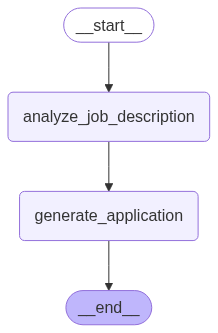

In [12]:
graph

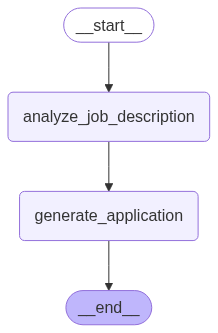

In [13]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
res = graph.invoke({"job_description": "This is a job description that is more than 100 characters long."})

Analyzing job description: This is a job description that is more than 100 characters long.
Generating application...


In [15]:
res

{'job_description': 'This is a job description that is more than 100 characters long.',
 'is_suitable': False,
 'application': 'Some fake application.....'}

In [21]:
from typing import Literal
builder = StateGraph(JobApplicationState)
builder.add_node("analyze_job_description", analyze_job_description)
builder.add_node("generate_application", generate_application)
def is_suitable_condition(state: StateGraph) -> Literal["generate_application", END]:
    if state.get("is_suitable"):
        return "generate_application"
    return END
builder.add_edge(START, "analyze_job_description")
builder.add_conditional_edges("analyze_job_description", is_suitable_condition)
builder.add_edge("generate_application", END)
graph = builder.compile()

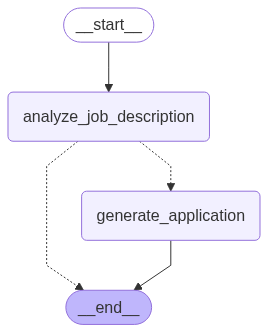

In [22]:
graph

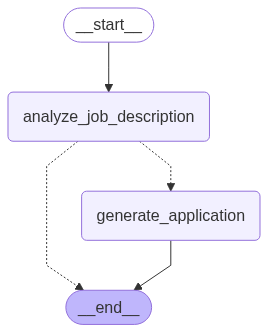

In [23]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
# Reducers

from typing_extensions import TypedDict
from typing import Annotated, Optional
from operator import add

class JobApplicationState(TypedDict):
    job_description: str
    is_suitable: bool
    application: str
    actions: Annotated[list[str], add]

In [26]:
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from langgraph.graph import MessagesState

class JobApplicationState(MessagesState):
    job_description: str
    is_suitable: bool
    application: str
    actions: Annotated[list[str], add]
    messages: Annotated[list[AnyMessage], add_messages]

In [ ]:
# making graphs configurable